In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
source = pd.read_csv("conversion_project.csv")
source

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


# Understand the dataset

0. understand the type of each column
1. missing value
2. abnormal value
3. number of classes for categorical;range for numerical

In [135]:
#type of each variables
source.info() #5 features, 316200 entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [136]:
#missing value
source.isnull().sum() #no missing value

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [5]:
source.describe() #only for features with numerical values
"""from mean:
   converted rate is roughly 3.23%
   average age of users are quite young 
   from min/max:
   abnormality in age -> 123 yrs old need to be investigated
   """

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [9]:
#for categorical feature: country , source
source.groupby(source['country']).size()

country
China       76602
Germany     13056
UK          48450
US         178092
dtype: int64

In [8]:
source.groupby(source['source']).size()

source
Ads        88740
Direct     72420
Seo       155040
dtype: int64

<AxesSubplot:ylabel='country'>

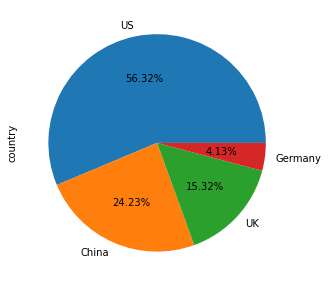

In [17]:
#use pie chart to see the constituents
source['country'].value_counts().plot(figsize=(5,5),kind='pie', autopct=lambda p:f'{p:.2f}%')
"""more than half of the clients are from US
   the website might be US based but with a large volumn of visit from China"""

<AxesSubplot:ylabel='source'>

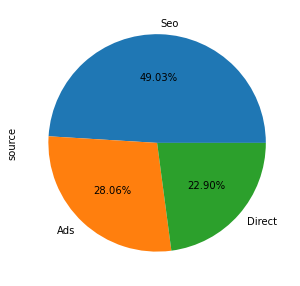

In [18]:
source['source'].value_counts().plot(figsize=(5,5),kind='pie', autopct=lambda p:f'{p:.2f}%')
"""nearly half of the visit are from clicking on search results
   direct URL and clicking though ads are similar"""

<AxesSubplot:ylabel='Frequency'>

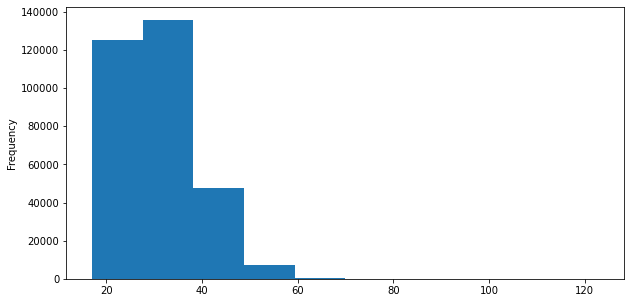

In [31]:
#use bar chart to see the age distribution of visitors
source['age'].plot(figsize=(10,5),kind='hist')
"""mostly from 17 to 70"""

In [34]:
print(sorted(source['age'].unique(), reverse=True))

[123, 111, 79, 77, 73, 72, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17]


In [35]:
source[source['age'] >= 100] #only 2 users aged more than 100 -> abnormal values for age, should drop 

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [137]:
source = source[source['age'] <= 100]
source.describe() #now have 316198 entries, max age is 79

,age,new_user,total_pages_visited,converted
count,316198.000000,316198.000000,316198.000000,316198.000000
mean,30.569311,0.685469,4.872918,0.032252
std,8.268958,0.464329,3.341053,0.176669
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,79.000000,1.000000,29.000000,1.000000


# Visualisation

Thoughts: converted rate = converted.mean
bar chart: show converted rate in each country
bar chart: show converted rate in each source
bar chart: show coverted rate in old/new user
bar chart: show converted rate in each age group
line chart: show relationship between total pages visited and converted rate 

<AxesSubplot:title={'center':'converted rate in each country'}, xlabel='country'>

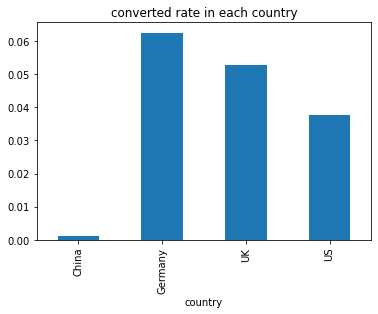

In [47]:
source.groupby(source['country'])['converted'].mean().plot(kind='bar', title='converted rate in each country')
"""converted rate from China is very low
   highest conversion rate from Germany although only 4% of visitors are from Germany
   thoughts: need to investigate why Chinese clients are less likely to make a purchase, could be high shipping fee?"""

<AxesSubplot:title={'center':'converted rate in each clicking source'}, xlabel='source'>

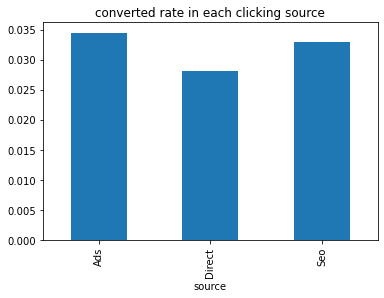

In [48]:
source.groupby(source['source'])['converted'].mean().plot(kind='bar', title='converted rate in each clicking source')
"""converted rate highest in Ads:
   thoughts: visitors are more likely to buy when clicking in through advertisement, could increase advertisement?"""

<AxesSubplot:title={'center':'converted rate in old/new users'}, xlabel='new_user'>

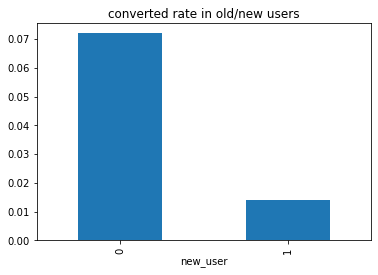

In [50]:
source.groupby(source['new_user'])['converted'].mean().plot(kind='bar', title='converted rate in old/new users')
"""converted rate is much higher amoung old users
   thoughts: should develop further on how to attrach exisiting clients, by loyalty disocunt?"""

<AxesSubplot:title={'center':'total page visited VS converted rate'}, xlabel='total_pages_visited'>

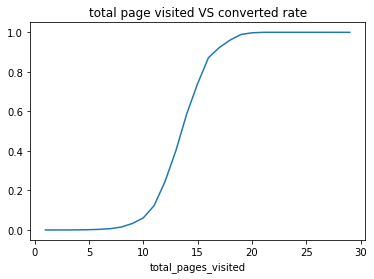

In [51]:
source.groupby(source['total_pages_visited'])['converted'].mean().plot(kind='line', title='total page visited VS converted rate')
"""visitors are more likely to visit if they click on more pages/spend more time
   thoughts: need to find a way to make website more attractive and increase visiting time"""

In [53]:
#better to divide age into age bins then plot
source['agebin'] = pd.cut(source['age'],10)

<AxesSubplot:title={'center':'converted rate in each age group'}, xlabel='agebin'>

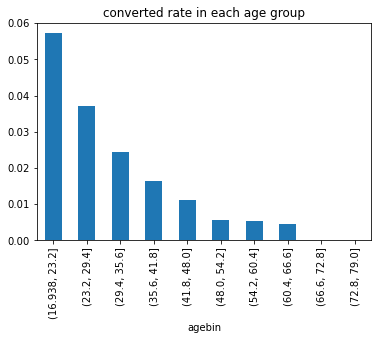

In [56]:
source.groupby(source['agebin'])['converted'].mean().plot(kind='bar', title='converted rate in each age group')
"""young people are more likely to make a purchase:
   thoughts: more promotion/products targeting young users, student discount?"""


Explore correlation:
univeriate correlation to "converted"
heatmap
note: need to make categorical features into numerical first

In [96]:
#apply one hot encoder to turn categorical features into numerical
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(source[['country','source']]).toarray()
feature_labels = ohe.get_feature_names()
feature_labels = np.array(feature_labels).ravel() #flattern everything into a 1d arrary
features = pd.DataFrame(feature_arr, columns=feature_labels)

In [101]:
features

,x0_China,x0_Germany,x0_UK,x0_US,x1_Ads,x1_Direct,x1_Seo
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
316193,0.0,0.0,0.0,1.0,1.0,0.0,0.0
316194,0.0,0.0,0.0,1.0,0.0,1.0,0.0
316195,1.0,0.0,0.0,0.0,1.0,0.0,0.0
316196,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [142]:
source = source.join(features.set_index(source.index))
source
#CAUTION: cannot join two dfs directly, although they are all same size, source has skip 2 rows with abnormal age
#so the indices in two df doesn't match, need to reset index

,country,age,new_user,source,total_pages_visited,converted,x0_China,x0_Germany,x0_UK,x0_US,x1_Ads,x1_Direct,x1_Seo
0,UK,25,1,Ads,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,US,23,1,Seo,5,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,US,28,1,Seo,4,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,China,39,1,Seo,5,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,US,30,1,Seo,6,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
316196,US,27,1,Direct,6,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
316197,China,25,0,Ads,4,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
316198,US,22,0,Seo,4,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [103]:
source = source.join(features)
source

,country,age,new_user,source,total_pages_visited,converted,x0_China,x0_Germany,x0_UK,x0_US,x1_Ads,x1_Direct,x1_Seo
0,UK,25,1,Ads,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,US,23,1,Seo,5,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,US,28,1,Seo,4,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,China,39,1,Seo,5,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,US,30,1,Seo,6,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
316196,US,27,1,Direct,6,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
316197,China,25,0,Ads,4,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
316198,US,22,0,Seo,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
source = source.drop(['country','source'], axis=1)
source #now all features are numerical

,age,new_user,total_pages_visited,converted,x0_China,x0_Germany,x0_UK,x0_US,x1_Ads,x1_Direct,x1_Seo
0,25,1,1,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,23,1,5,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,28,1,4,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,39,1,5,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30,1,6,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
316196,27,1,6,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
316197,25,0,4,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
316198,22,0,4,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


Explore correlation

In [146]:
corr = source.corr()
corr.style.background_gradient(cmap='coolwarm')
"""warmer means more positively correlated
   cooler means more negatively correlated
   looking at converted: age has negatively effect on converted rate, total page visited has positive impact"""

,age,new_user,total_pages_visited,converted,x0_China,x0_Germany,x0_UK,x0_US,x1_Ads,x1_Direct,x1_Seo
age,1.000000,0.012445,-0.046093,-0.089199,0.007088,-0.003173,-0.006144,-0.000388,-0.002680,-0.000088,0.002482
new_user,0.012445,1.000000,-0.082522,-0.152338,0.015892,-0.003656,-0.005149,-0.008522,0.000321,0.001626,-0.001655
total_pages_visited,-0.046093,-0.082522,1.000000,0.528975,-0.054054,0.019693,0.026629,0.019456,0.004966,-0.009138,0.003218
converted,-0.089199,-0.152338,0.528975,1.000000,-0.098961,0.035446,0.049023,0.035666,0.007849,-0.012596,0.003534
x0_China,0.007088,0.015892,-0.054054,-0.098961,1.000000,-0.117340,-0.240524,-0.642090,0.001037,-0.001431,0.000270
x0_Germany,-0.003173,-0.003656,0.019693,0.035446,-0.117340,1.000000,-0.088276,-0.235657,0.003403,-0.004768,0.000949
x0_UK,-0.006144,-0.005149,0.026629,0.049023,-0.240524,-0.088276,1.000000,-0.483053,-0.001562,0.000722,0.000797
x0_US,-0.000388,-0.008522,0.019456,0.035666,-0.642090,-0.235657,-0.483053,1.000000,-0.001127,0.002624,-0.001193
x1_Ads,-0.002680,0.000321,0.004966,0.007849,0.001037,0.003403,-0.001562,-0.001127,1.000000,-0.340438,-0.612631
x1_Direct,-0.000088,0.001626,-0.009138,-0.012596,-0.001431,-0.004768,0.000722,0.002624,-0.340438,1.000000,-0.534595


# Modelling

This is a binary classification problem:

In [112]:
source.columns #10 features and 1 target

Index(['age', 'new_user', 'total_pages_visited', 'converted', 'x0_China',
       'x0_Germany', 'x0_UK', 'x0_US', 'x1_Ads', 'x1_Direct', 'x1_Seo'],
      dtype='object')

In [147]:
X = source.drop(['converted'], axis=1)
Y = source['converted']

In [148]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(len(x_train))
print(len(x_test))

211852
104346


In [153]:
#try random forest:
#because 1. RF has feature importance; 2.quick to train
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
y_rf = rf.fit(x_train, y_train).predict(x_test)
print("random forest accuracy is:", accuracy_score(y_test, y_knn))

random forest accuract is: 0.9848868188526633


<AxesSubplot:>

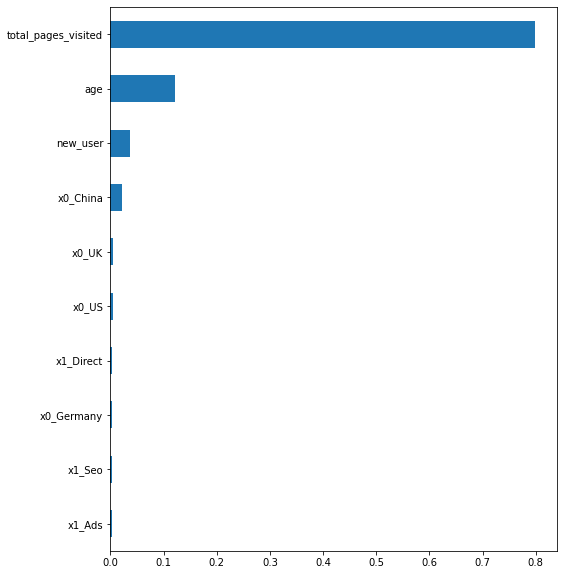

In [158]:
feat_importance = pd.Series(rf.feature_importances_, index = x_train.columns)
feat_importance.sort_values().plot(kind='barh')
"""most important features is total pages visited, age and new_user """

In [161]:
pip install pdpbox

     |████████████████████████████████| 34.0 MB 416 kB/s eta 0:00:01
     |████████████████████████████████| 37.8 MB 992 kB/s eta 0:00:01
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758226 sha256=8015f4b342c72721c2e3155de9ab7cb478851c197974dac4afb229bdba90b2f8
  Stored in directory: /Users/julieyang/Library/Caches/pip/wheels/35/fb/ef/a08dd2a1611435285fa3f9d9104bf554f10c2eb7293b526ccb
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp38-cp38-macosx_10_9_x86_64.whl size=8458361 sha256=386d1e5ae16ce924bed0d34818277ee49c0c7dd2eef72b574584664a3a4cc4cc
  Stored in directory: /Users/julieyang/Library/Caches/pip/wheels/85/86/f1/054e7477b5e68f3c4a1258d12ae1c2205d6889283ce631dfe5
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=020d734f4f18d7a599f1234e0d6a85057b51917790af3309b0ff578e2e6e7f64
  Stored in directory: /Users/julieyang/Library/Caches/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Su

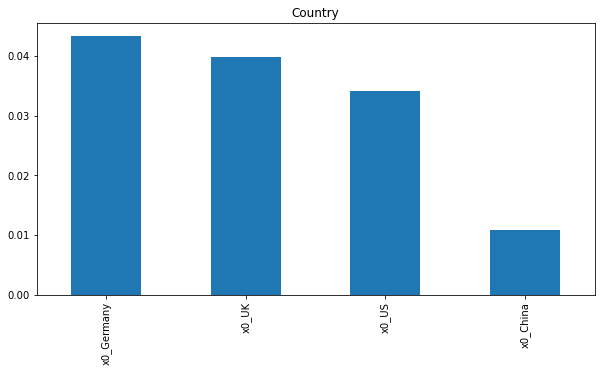

In [168]:
from pdpbox import pdp, info_plots
pdp_iso = pdp.pdp_isolate(model=rf, 
                          dataset=x_train,      
                          model_features=x_train.columns, 
                          feature=['x0_Germany', 'x0_UK', 'x0_US', 'x0_China'])
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(figsize=(10,5),kind='bar', title='Country')
plt.show()
"""Interpreate: clients from Germany are 3% more likely to make a purchase than from China"""

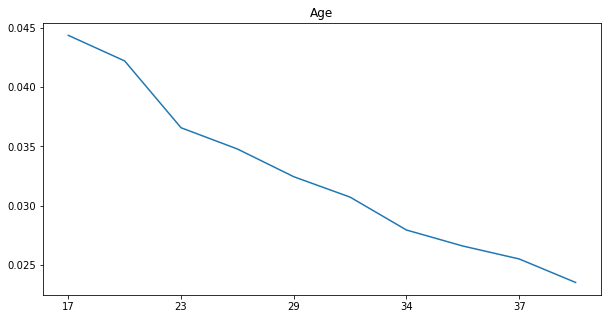

In [171]:
pdp_iso = pdp.pdp_isolate(model=rf, 
                          dataset=x_train,      
                          model_features=x_train.columns, 
                          feature='age')
pdp_dataset = pd.Series(pdp_iso.pdp, index=pdp_iso.display_columns)
pdp_dataset.sort_values(ascending=False).plot(figsize=(10,5),kind='line', title='Age')
plt.show()
"""Interpreate: clients at 17 are 2% more likely to make a purchase than clients at 37"""

# Conclusion

Summary:
Total number of pages visited, age and old users are the most significant features for conversion rate. 
In specific:
1. The more pages visited, the more likely a client will make a purchase. This means the company should invest more on website design, for example, recommend products of similar type or accesory products could attract clients to browse more pages, which may increase the conversion rate.
2. Age is negatively correlated with converstion rate, especially low conversion rate for clients over 37. There are two possible routes for the company, one is to strength its popularity amoung the young people, by designing products targeting clients from 17-30; the other is to design a new product chain to develop market for people aged 35+,for example, could be a series of light luxury suits.
3. Conversion rate is significantly higher amoung old customers (roughly 7% compare to 1% in new customers). Hence, the marketing strategy should focus on increase the loyalty of existing clients, for example, could have member discount, royalty card etc to attract old clients to revisit. This is also a reflection to show the good performance in customer services: clients are more likely to come back if their previous shopping experience is enjoyable. 
4. The website has very high conversion rate from German clients, but extremely low from Chinese clients. It is worth noting that the total number of German clients are the lowest among 4 countries (roughly 4%). Thus, there are 2 urgent actions to take: the first is to increase the advertisement in Germany, increase the number of German clients; the second is to investigate further why Chinese clients are less likely to make a purchase, for exmaple, it could the translation/design is not good enough, or the shipping fee is to high/payment method is not supported in China. Since China is an enormous market, fixing the low conversion rate problem among Chinese clients could be a great opportnity for the company.
5. It is interesting to note that the source is relatively insignificant. Clients entering through direct URL, web search or advertisement have a similar conversion rate. This means the marketing team could reaccess the cost-effectiveness of different advertising methods.

# A/B Testing

Background:

Convertion rate is lower in LatAm than Spain, experimenting whether translation is a cause

A: translation made by Spaniard translator

B: translation made by local translator

Y-Lable: change in conversion rate


Target:

1. Confirm version B is actually even worse off than A?

2. Explore Why -> could it be the design is biased?

3. What is the solution?

In [18]:
#load datasets
user_df = pd.read_csv('user_table.csv')
test_df = pd.read_csv('test_table.csv')

In [19]:
user_df
"""user_df contains infomation about users:
id, gender, sex, age, country"""

'user_df contains infomation about users:\nid, gender, sex, age, country'

In [20]:
test_df
"""info about test result
test column: 0/1 indicates control/test set """

'info about test result\ntest column: 0/1 indicates control/test set '

In [21]:
#use inner join to merge user table and test table on user_id
main_df = user_df.merge(test_df, on='user_id',how='inner')
main_df

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
1,343561,F,27,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
2,118744,M,23,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1
3,987753,F,27,Venezuela,2015-12-04,SEO,Web,ES,NaN,IE,0,1
4,554597,F,20,Spain,2015-12-04,Direct,Web,ES,NaN,Chrome,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
452862,756215,F,27,Venezuela,2015-12-03,SEO,Web,EN,NaN,IE,0,0
452863,36888,M,18,Argentina,2015-12-01,SEO,Mobile,ES,NaN,Android_App,0,0
452864,800559,M,28,Bolivia,2015-12-03,SEO,Mobile,ES,NaN,Android_App,0,0
452865,176584,M,19,Chile,2015-12-04,Ads,Web,ES,Google,IE,0,1


In [22]:
main_df.describe(include='all')
"""note: why NaN in some cells
The describe method for numeric columns doesn't list the number of unique values, 
since this is usually not particularly meaningful for numeric data, 
the describe method for string columns does"""

"note: why NaN in some cells\nThe describe method for numeric columns doesn't list the number of unique values, \nsince this is usually not particularly meaningful for numeric data, \nthe describe method for string columns does"

In [23]:
#split into control/test set
control_df = main_df[main_df['test']==0]
control_df

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
1,343561,F,27,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
4,554597,F,20,Spain,2015-12-04,Direct,Web,ES,NaN,Chrome,0,0
5,62371,M,29,Ecuador,2015-12-02,Direct,Mobile,ES,NaN,Iphone_App,0,0
6,987967,M,31,Spain,2015-12-04,SEO,Web,ES,NaN,Chrome,0,0
10,224416,F,49,Spain,2015-12-04,Direct,Web,ES,NaN,Chrome,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
452859,759473,M,29,Venezuela,2015-12-03,SEO,Mobile,EN,NaN,Android_App,0,0
452861,40163,M,59,Chile,2015-12-03,Direct,Web,ES,NaN,Chrome,0,0
452862,756215,F,27,Venezuela,2015-12-03,SEO,Web,EN,NaN,IE,0,0
452863,36888,M,18,Argentina,2015-12-01,SEO,Mobile,ES,NaN,Android_App,0,0


In [24]:
btest_df = main_df[main_df['test']==1]
btest_df

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
2,118744,M,23,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1
3,987753,F,27,Venezuela,2015-12-04,SEO,Web,ES,NaN,IE,0,1
7,499510,F,29,Paraguay,2015-12-04,Ads,Web,EN,Google,FireFox,0,1
8,364726,F,29,Colombia,2015-12-02,Direct,Web,ES,NaN,Chrome,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
452856,214527,M,19,Guatemala,2015-12-03,SEO,Web,ES,NaN,Chrome,0,1
452858,224100,M,21,Argentina,2015-11-30,SEO,Web,EN,NaN,FireFox,0,1
452860,819514,M,28,Mexico,2015-12-01,Direct,Mobile,ES,NaN,Android_App,0,1
452865,176584,M,19,Chile,2015-12-04,Ads,Web,ES,Google,IE,0,1


In [25]:
#general conversion rate in LatAm countries 
print("conversion rate in LatAm countries in control set is:", control_df[control_df['country'] != 'Spain']['conversion'].mean())
print("conversion rate in LatAm countries in test set is:", btest_df['conversion'].mean())
"""we can see the conversion rate for LatAm countries actually decreases in btest set"""

conversion rate in LatAm countries in control set is: 0.04829179055749524
conversion rate in LatAm countries in test set is: 0.043411161678422794


'we can see the conversion rate for LatAm countries actually decreases in btest set'

# t test

The converesion rate in two sets is different, but we need to understand if this difference is real or simply due to chance!

here we use introduce t-test:

Procedure:

a. calculate t statistics

   find critical value

   if |t stat| is less than critical value, then fail to reject null hypothesis

b. find p value [eaiser as don't need to consider degree of freedom]

   if p value is greater then 0.05, the we fail to reject null hypothesis at 95% confidence interval

Types of t-test:

1. one-sample t-test: we compare the average (or mean) of one group against the set average or mean

$t = \frac{(m - {\mu})}{(std/ \sqrt{n})}$

${\mu}$: theoretical mean

m: mean of the group

std: standard deviation of the group

n: size of the group

2. independent 2-sample t-test: compare the mean of 2 different samples

$t = \frac {m_{A} - m_{B}} {\sqrt{\frac{S^2}{n_{A}} + \frac{S^2}{n_{B}}}}$

$m_{A,B}$: means of two samples

$n_{A,B}$: size of two samples

$S^2 =  \frac{\sum(x-m_{A})^2 + \sum(x-m_{B})^2} {n_{A}+n_{B} - 2}$: estimator of the common variance of 2 samples

degree of freedom: $n_{A} + n_{B} - 2$

3. paired sample t-test: compare the sample mean at two different time (before and after)

$t = \frac{m} {std/\sqrt{n}}$



In [94]:
#it is suitable to use independent 2 sample t test: stats.ttest_ind
"""H0: the mean between 2 groups is not significantly different"""
import scipy
from scipy import stats
test = stats.ttest_ind(control_df[control_df['country'] != 'Spain']['conversion'], 
                       btest_df['conversion'],
                       equal_var = False)   #equal_var=False: does not assume equal population variance bet
print("t statsitic is:", test.statistic)
print("p value is:", test.pvalue)
df = control_df[control_df['country'] != 'Spain'].shape[0] + btest_df.shape[0] - 2
print("critical value at 95% is:",scipy.stats.t.ppf(1-0.05,df))
"""t stat > critical value at 95%: 
   reject null hypothesis H0 -> the mean is statistically different at 95%
   p value << 0.05:
   reject null hypothesis"""

t statsitic is: 7.353895203080277
p value is: 1.928917857779903e-13
critical value at 95% is: 1.644857426097007


In [26]:
#specific conversion rate in each country
df1 = btest_df.groupby(btest_df['country'], as_index=False)['conversion'].mean()
df2 = control_df.groupby(control_df['country'], as_index=False)['conversion'].mean()
convrate_df = df1.merge(df2, how = 'inner', on='country', suffixes=('_test','_control'))
convrate_df

,country,conversion_test,conversion_control
0,Argentina,0.013725,0.015071
1,Bolivia,0.047901,0.049369
2,Chile,0.051295,0.048107
3,Colombia,0.050571,0.052089
4,Costa Rica,0.054738,0.052256
5,Ecuador,0.048988,0.049154
6,El Salvador,0.047947,0.053554
7,Guatemala,0.048647,0.050643
8,Honduras,0.047540,0.050906
9,Mexico,0.051186,0.049495


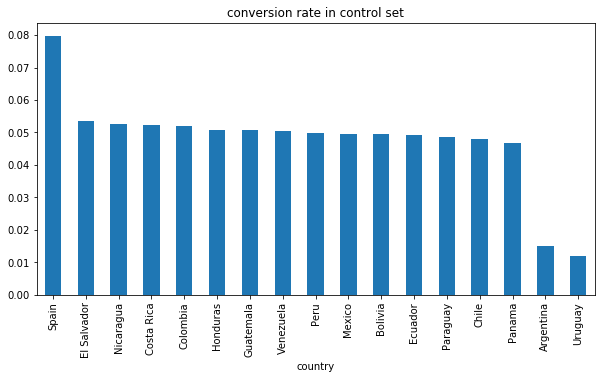

In [27]:
control_df.groupby(control_df['country'])['conversion'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title='conversion rate in control set')

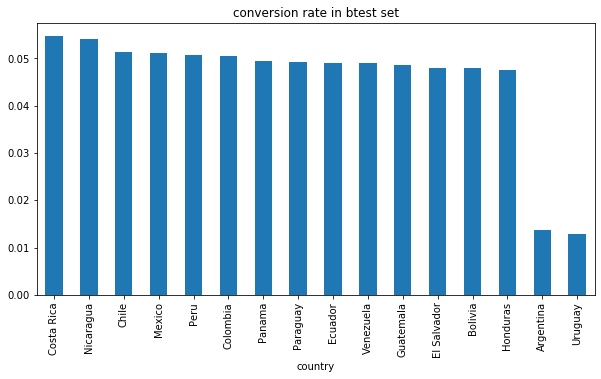

In [28]:
btest_df.groupby(btest_df['country'])['conversion'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,5), title="conversion rate in btest set")

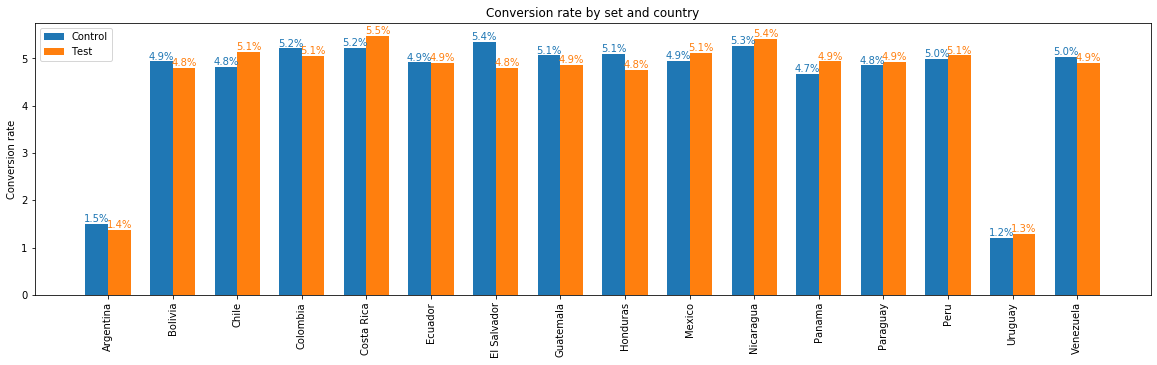

In [84]:
#plot together to see contrast
labels = convrate_df['country']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, convrate_df['conversion_control']*100, width, label='Control')
rects2 = ax.bar(x + width/2, convrate_df['conversion_test']*100, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Conversion rate')
ax.set_title('Conversion rate by set and country')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()

#below code is to show number value above each bar, but since the conversion rate is very small and similar, not bery useful 
for bar in ax.patches:
  # The text annotation for each bar should be its height.
    bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
    text = f'{bar_value:.1f}%'
  # This will give the middle of each bar on the x-axis.
    text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
    text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
    bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,size=10)

plt.show()


The most likely reason for weird A/B test results are: 

1. We didn’t collect enough data 

2. Some bias has been introduced in the experiment so that test/control people are not really random 

'we can see the conversion rate in control set is higher than test set throughout the experiment,\nso we could basically rule out the possibility of not collecting enough data'

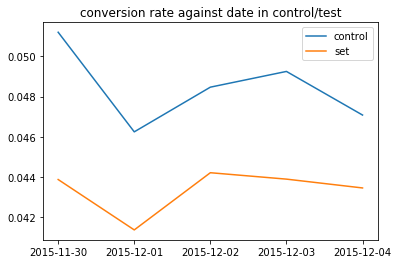

In [30]:
"""first step: whether it is because not enough data"""
#note: there is timestamp in the test table
#check: whether the different performance in A/B test occurs at a specific time or throughout the experiment
#idea: plot line chart to show conversion rate in LatAm for both sets against date
fig,ax = plt.subplots()
ax.plot(control_df[control_df['country'] != 'Spain'].groupby('date')['conversion'].mean())
ax.plot(btest_df.groupby('date')['conversion'].mean())
ax.legend(['control','set'])
ax.set_title('conversion rate against date in control/test')
"""we can see the conversion rate in control set is higher than test set throughout the experiment,
so we could basically rule out the possibility of not collecting enough data"""

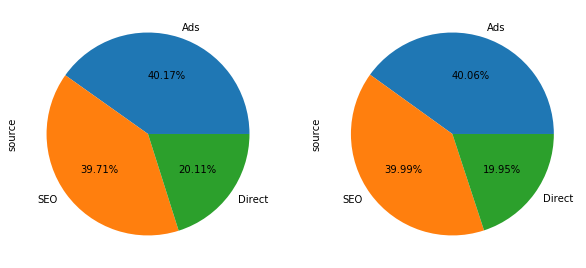

In [31]:
"""second step: check the randomization -> all variables should have the same distribution in test and control"""
plt.figure(figsize=(10,10))
plt.subplot(121)
control_df['source'].value_counts().plot(kind='pie', autopct=lambda p:f'{p:.2f}%')
plt.subplot(122)
btest_df['source'].value_counts().plot(kind='pie', autopct=lambda p:f'{p:.2f}%')

we have 8+ feature distribution to check, it will be very time consuming

let's use a machine learning classification algorithm:

8 features as x, test 1/0 as y

if the randomization works well, should be unable to classify

choose decision tree as it would show clearly which variable is causing the split

In [33]:
latam_df = main_df[main_df['country']!= 'Spain']

<ipython-input-43-206607eeb078>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latam_df['date'] = latam_df['date'].apply(str)


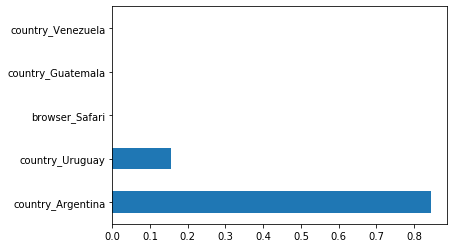

In [43]:
from sklearn.tree import DecisionTreeClassifier

#make date as string, so few dates that makes sense to have them as few dummy values  
latam_df['date'] = latam_df['date'].apply(str)
  
#make dummy vars. Don't drop one level here, keep them all. You don't want to risk dropping the one level that actually creates problems with the randomization
data_dummy = pd.get_dummies(latam_df)
#model features, test is the label and conversion is not needed 
train_cols = data_dummy.drop(['test', 'conversion'], axis=1)
  
tree=DecisionTreeClassifier(
    #change weights. Our data set is now perfectly balanced. It makes easier to understand the tree output
    class_weight="balanced",
    #only split if if it's worthwhile. The default value of 0 means always split no matter what if you can increase overall performance, which creates tons of noisy and irrelevant splits
    min_impurity_decrease = 0.001
    )
tree.fit(train_cols,data_dummy['test'])
feat_importance = pd.Series(tree.feature_importances_, index = train_cols.columns)
feat_importance.sort_values(ascending=False).head(5).plot(kind='barh')

from the feature importance result, we could see only country Argentina and Uruguay is affecting the classification

this means very likely the country distribution in control and test is not similar

In [76]:
#explore country contribution
con_latam_df = control_df[control_df['country'] != 'Spain']
df3 = (con_latam_df['country'].value_counts()/con_latam_df.shape[0]).to_frame()
df4 = (btest_df['country'].value_counts()/btest_df.shape[0]).to_frame()
country_dis = df4.merge(df3, how='inner',left_index=True, right_index=True, suffixes=('_test','_control'))
country_dis

,country_test,country_control
Mexico,0.297881,0.346493
Argentina,0.173223,0.050488
Colombia,0.125001,0.146176
Peru,0.077845,0.091031
Venezuela,0.073711,0.087145
Chile,0.045807,0.053170
Ecuador,0.036422,0.043365
Guatemala,0.034772,0.041131
Bolivia,0.025833,0.029950
Honduras,0.019497,0.023533


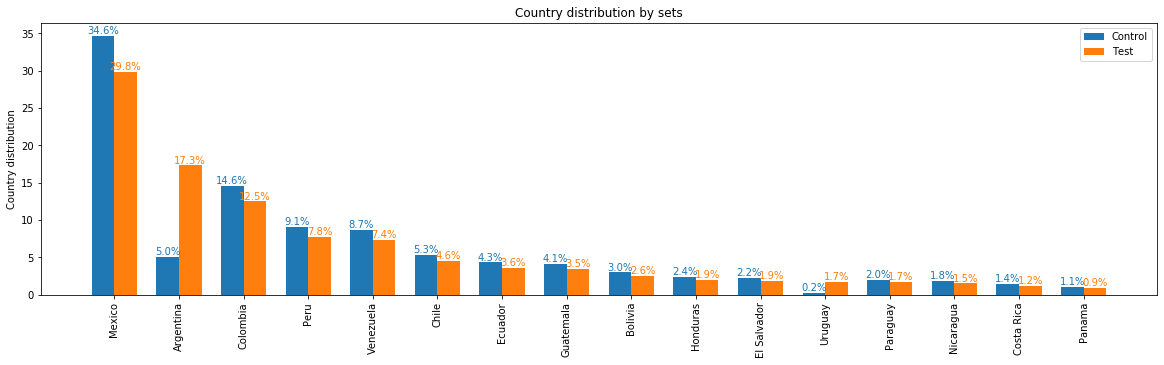

In [85]:
#plot together to see contrast
labels = country_dis.index

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(x - width/2, country_dis['country_control']*100, width, label='Control')
rects2 = ax.bar(x + width/2, country_dis['country_test']*100, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Country distribution')
ax.set_title('Country distribution by sets')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()

for bar in ax.patches:
  # The text annotation for each bar should be its height.
    bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
    text = f'{bar_value:.1f}%'
  # This will give the middle of each bar on the x-axis.
    text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
    text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
    bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,size=10)

plt.show()


In [97]:
#remove Argentina and Uruguay
removed_df = latam_df[(latam_df['country'] != 'Argentina') & (latam_df['country'] != 'Uruguay')]
removed_df

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
1,343561,F,27,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
2,118744,M,23,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1
3,987753,F,27,Venezuela,2015-12-04,SEO,Web,ES,NaN,IE,0,1
5,62371,M,29,Ecuador,2015-12-02,Direct,Mobile,ES,NaN,Iphone_App,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
452861,40163,M,59,Chile,2015-12-03,Direct,Web,ES,NaN,Chrome,0,0
452862,756215,F,27,Venezuela,2015-12-03,SEO,Web,EN,NaN,IE,0,0
452864,800559,M,28,Bolivia,2015-12-03,SEO,Mobile,ES,NaN,Android_App,0,0
452865,176584,M,19,Chile,2015-12-04,Ads,Web,ES,Google,IE,0,1


In [98]:
print("conversion rate in control set is:", removed_df[removed_df['test']==0]['conversion'].mean())
print("conversion rate in test set is:", removed_df[removed_df['test']==1]['conversion'].mean())

conversion rate in control set is: 0.05014811438988265
conversion rate in test set is: 0.050412759477438486


In [100]:
"""H0: the mean between 2 groups is not significantly different"""
test_r = stats.ttest_ind(removed_df[removed_df['test']==0]['conversion'], 
                       removed_df[removed_df['test']==1]['conversion'],
                       equal_var = False)   #equal_var=False: does not assume equal population variance bet
print("t statsitic is:", test_r.statistic)
print("p value is:", test_r.pvalue)
df_r = removed_df.shape[0] - 2
print("critical value at 95% is:",scipy.stats.t.ppf(1-0.05,df_r))

t statsitic is: -0.35834557944814466
p value is: 0.7200849282884503
critical value at 95% is: 1.644857977904035


# Conclusion

after removing the bias distribution in Argentina and Uruguay, convesion rate in 2 groups is very close, 
absulote value of t stat is smaller than critical value: fail to reject H0
p value is greater than 0.05: fail to reject Ho at 95% CI
this means we accept the mean is statistically insignificant
at least it shows the localized translation (our B test) is not worse off